# Richardson iteration

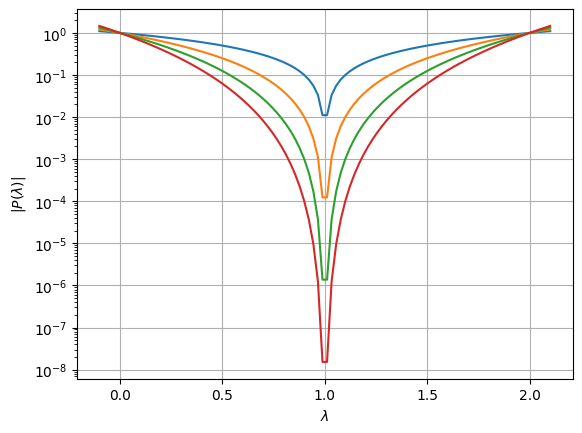

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def P(x, k, alphas=None):
    if alphas is None:
        alphas = np.ones(k)
    return abs((1 - alphas[None, :] * x[:, None]).prod(1))
    # return abs((1 - x) ** k)

x = np.linspace(-0.1, 2.1, 100)
for k in range(1, 5):
    plt.plot(x, P(x, k), label='k')

plt.grid()
plt.ylabel(r'$|P(\lambda)|$')
plt.xlabel(r'$\lambda$')
plt.yscale('log')

# Chebyshev iteration

Text(0.5, 0, '$\\lambda$')

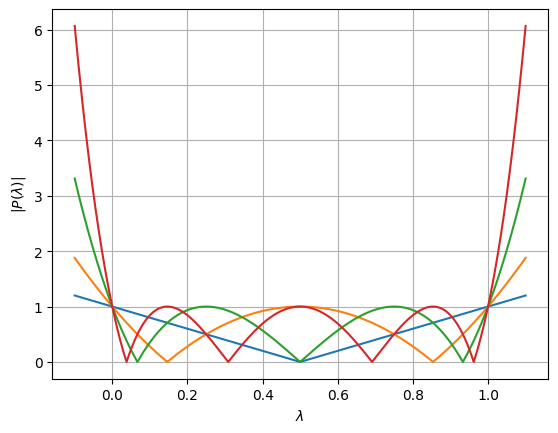

In [3]:
def cheby(x, k):
    cheb_poly = np.polynomial.chebyshev.Chebyshev(
        [0] * k + [1], domain=[-0, 1], window=[-1, 1]
    )
    roots = cheb_poly.roots()
    return P(x, k, 1 / roots)

x = np.linspace(-0.1, 1.1, 1000)
for k in range(1, 5):
    # y = x[:, None] - roots[None, :]
    # y = (y.prod(1))
    # y = P(x, k, 1/roots)
    y = cheby(x, k)
    plt.plot(x, y, label="k")

plt.grid()
plt.ylabel(r"$|P(\lambda)|$")
plt.xlabel(r"$\lambda$")
# plt.yscale('log')

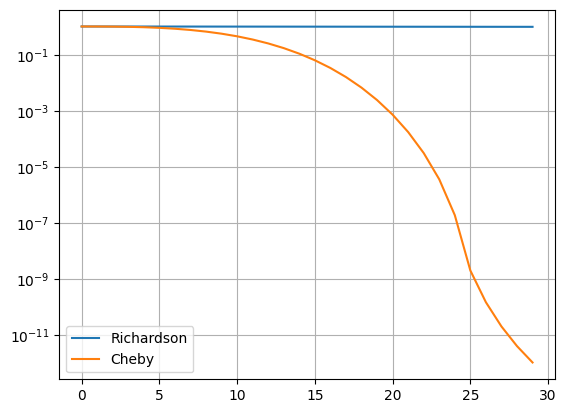

In [6]:
def cheby_recursive(x, k):
    res = np.ones_like(x)
    for i in range(1, k + 1):
        res *= cheby(x, i)
    return res


lamda = 0.001
num_iterations = 30
plt.plot([P(np.array([lamda]), k) for k in range(num_iterations)], label='Richardson')
plt.plot([cheby_recursive(np.array([lamda]), k) for k in range(num_iterations)], label="Cheby")
plt.legend()
plt.yscale("log")
plt.grid()